# Final Report


## Author: Trinity Pittman

## 1 Introduction

This project aimed to develop an image classification model capable of accurately distinguishing between images of pandas and bears. This is a binary image classification task and was accomplished using Convultional Neural Networks (CNN). CNNs are well-suited for image classificaiton due to their ability to automatically learn hierechical features from images. See more about this in the `Model Selection & Training` notebook, Section `2.1 What is a Convolutional Neural Network`.

The PandasBears dataset was used, this dataset consists of 640 images divided into two classes: pandas and bears. The dataset was further split into a training set with 128 images, 64 per class. As well as a testing set with 512 images, 256 per class. The images were resized to 128x128 pixels to ensure consistency.

## 2 Data Exploration and Preprocessing

### 2.1 Observations
The dataset had a balanched class distribution with an equal number of images for pandas and bears. This prevents the potential bias towars one class. I did not need to wory about the frequency of images causing underfitting or overfitting in my model. See the figure below that shows the distrubution.

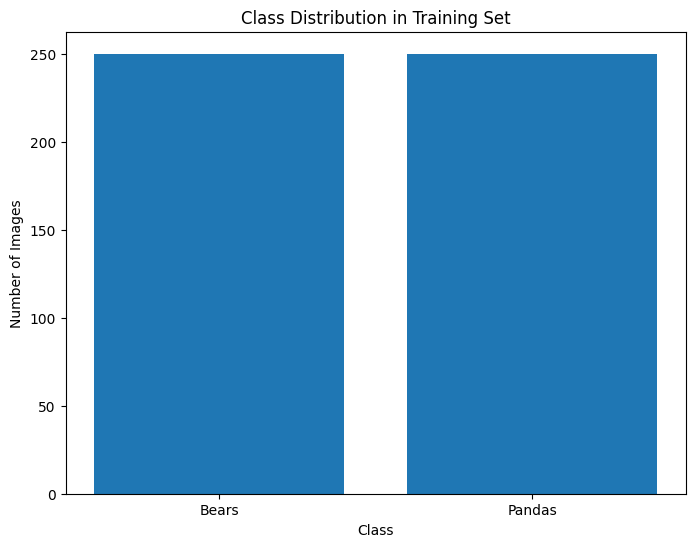

To determine the quality of images I viewed a sample from the dataset. This insight allowed me to determine, while these images were obviously created by AI, they still represent the main features of pandas and bears and have consistent, yet varying qualities.

Next, I checked for missing or corrupted images by attempting to load each image. I found no corruption in the dataset, ensuring data integrity.

The average brightness of the images was slightly dark, with a mean pixel value of `101.7`. This value ranges from `0` (black) to `255` (white), it is evident the pictues are more black than white. The standard deviation of `81.1` measures the spread/variation of pixel values around the mean. This value suggests there is a significant amount of variation in the pixel values meaning the images have a decent amount of contrast and detail.

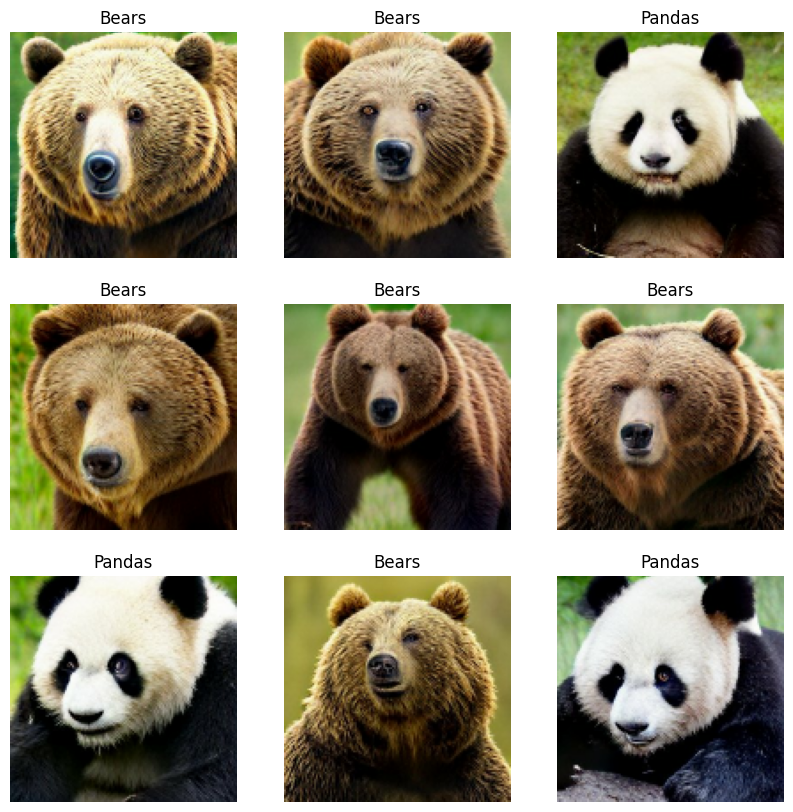

### 2.2 Preprocessing Steps

To preprocess the dataset, Z-score normilization was applied in order to standardize the pixel values. By centering the data around 0 with a standard deviation of 1, normilization can significatly improve the performance of the model. Data augmentation techniques (random flipping, rotation, and zooming) were also used to expand the dataset and improve model robustness. In order to optimize the model for the next step, caching, shuffling, and prefetching were used.

### 3 Model Selection & Training

### 3.1 Convolutional Neural Networks.

Convolutional Neural Networks were chosen for their strong performance in image classification tasks. They are similiar to normal neural networks like we discused in class except that they are designed for an input of grid-like data or images. CNN's also automatically learn hierachical features from the input image through their layers. Another important feature is *weight sharing*, CNN's apply the same filter across different parts of an image reducing the parameters and making the model more efficient.

They are made up of 3 main types of layers:

1. Convolutional Layer
  - core building block, does most of the computational heavy lifting
  - a series of learnable filters that slide across the image and perform element-wise mutliplications and summations to produce feature maps
2. Pooling Layer
  - reduce the spatial deminsions of the feature maps
  - reduce the amount of paramaeters and computation in the network -> control overfitting
  - makes the network less sensitive to minor variations in the input
3. Fully Connected Layer
  - connect all neurons in one layer to all neurons in the next layer
  - used to learn complex relationships between features and make predictions

These layers are stacked to form a full ConvNet architecture. The specific architecture chosen was inspired by the common pattern of alternating convolutional and pooling layers followed by fully connected layers. It is made up of two convolutional layers stacked before every pool layer. This helps the model develop more complex features.

\
### 3.2 ReLU Activation Funtion

ReLU (Rectifd Linear Unit) activation function was chosen for the neural network for a few reasons.
1. It is non-linear : needed for neural networks to learn complex patterns in data
  - allows the network to approximate a wide range of functions and solve more complex problems (like image classification)
2. Efficiency : faster than activation functions like sigmoid or tanh (Especially for image classification!)
3. Sparsity : since this activation function outputs 0 for negative inputs, this introduces sparcity in the networks activations leading to better generalization and preventing overfitting

\
### 3.3 The Adam Optimizer

The Adam optimizer was used to adaptively adjust the learning rate during training. It is an adaptive learning rate optimization algorithm - it auto adjusts the learning rate for each parameter during training. Some more features include:
1. Efficient - often faster than other optimizers (espicially in deep learning neural networks)
2. Adaptability - can handle sparse gradients and noisy data more effectively
3. Easy of use - less hyperparameter tuning
4. Works well with large datasets
5. Well-suited or deep neural networks

The sparse categorical cross-entropy loss function was employed for multi-class classification with integer labels.

\
### 3.4 Optimization of the Model

After the first run of the model, potential overfitting was observed due to the high training accuracy and significantly lower validation accuracy observed on the 5th and 7th epochs. To combat this issue I implemented early stopping to prevent overfitting by monitoring the validation loss and restoring the best model weights.

\
The model was still not significantly better after this improvement. Therefore, L1 and L2 regularization techniques and dropout were introduced to further combat potential overfitting.

> **L1 and L2 Regularization** adds penalty terms to the loss function and discorages large weights in the model. **L1** encourages sparsity and **L2** encourages smaller weights overall.

> **Dropout** randomly sets a fraction of input units to 0 at each update during training in an effort to prevent overfitting by reducing interdependence between neurons.

After one run with this improvement I saw a decrease in performance so I lowered the regularizer from `0.01` to `0.001` and decreased the dropout of the dense layers from `0.5` to `0.25` and the dropout of conv layers from `0.25` to `0.15`. This brought my performance back up and was successful.

See the image below for a representation of whether the model is overfitting or not. Since the training accuracy is never significantly higher than the validation accuracy the model is likely not overfitting.

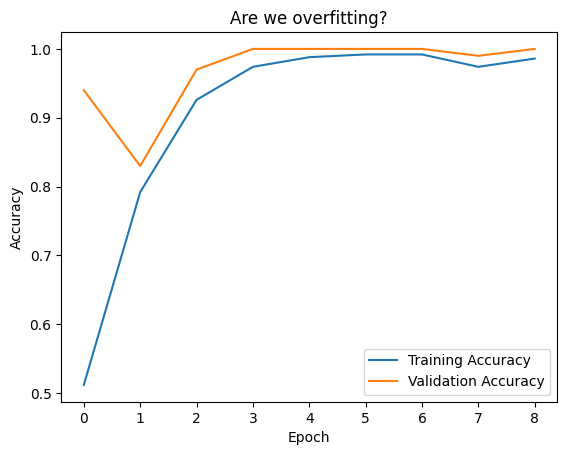

## 4 Performance Evaluation

### 4.1 Evaluation Metrics

The model achieved exceptional performance, achieving perfect accuracy (100%) on the test dataset. The loss was also remarkably low, indicating high confidence in the predicitons. Further analysis using a confusion matrix confirmed the model's ability to correctly classify all images.

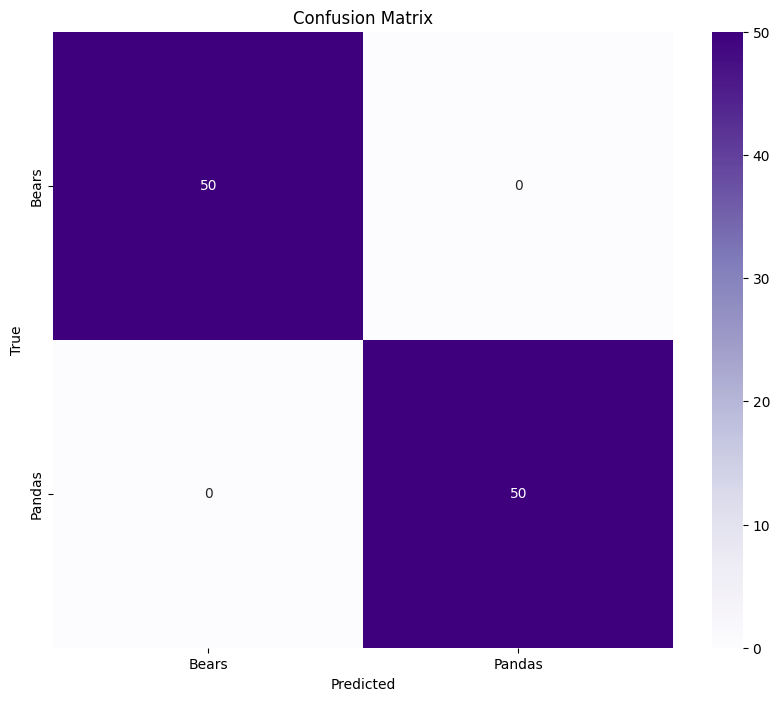

To evaluate the model, I chose to use the F1-score primarly due to its combination of both precision and recall. The datasets characterists (balanced classes and binary classification) makes this the most suitable choice. Although, the model performed exceptionally well on every metric, meaning the model makes no mistakes classifying bears or pandas.

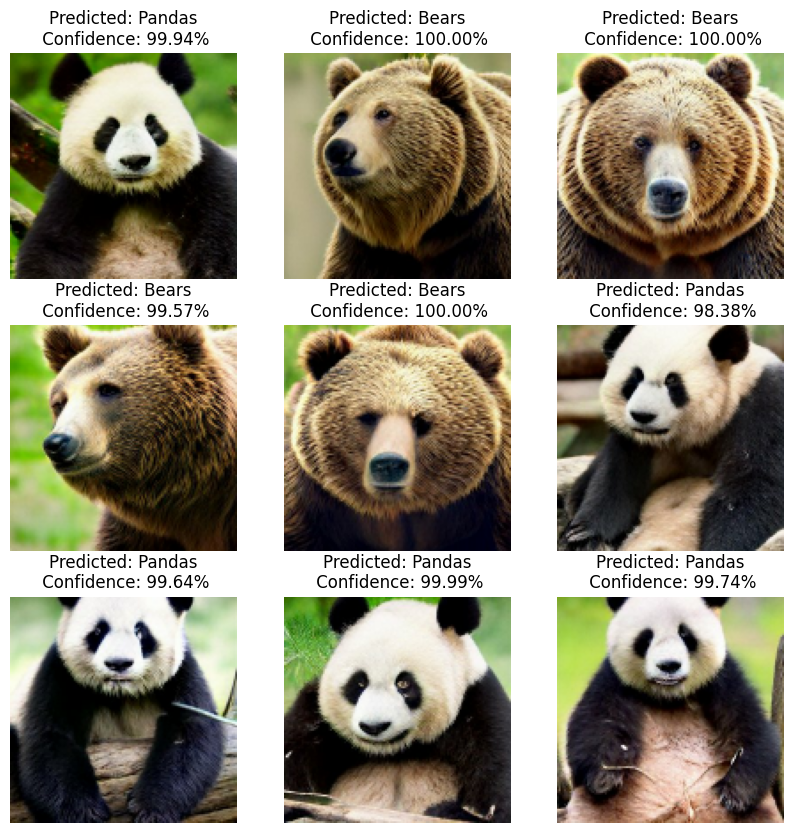

### 4.2 Outside Data Testing

In order to confirm the model is not just memorizing training data, I also tested it on outside images I found from google. I found 10 images that were similiar in framing to the PandasBears dataset, 5 of which were pandas, and 5 bears. The model classified each image correctly with high accuracy. This means the model performs well on new, unseen images in real-work scenarios and is also a strong indicator that the model is not overfit to the training data.

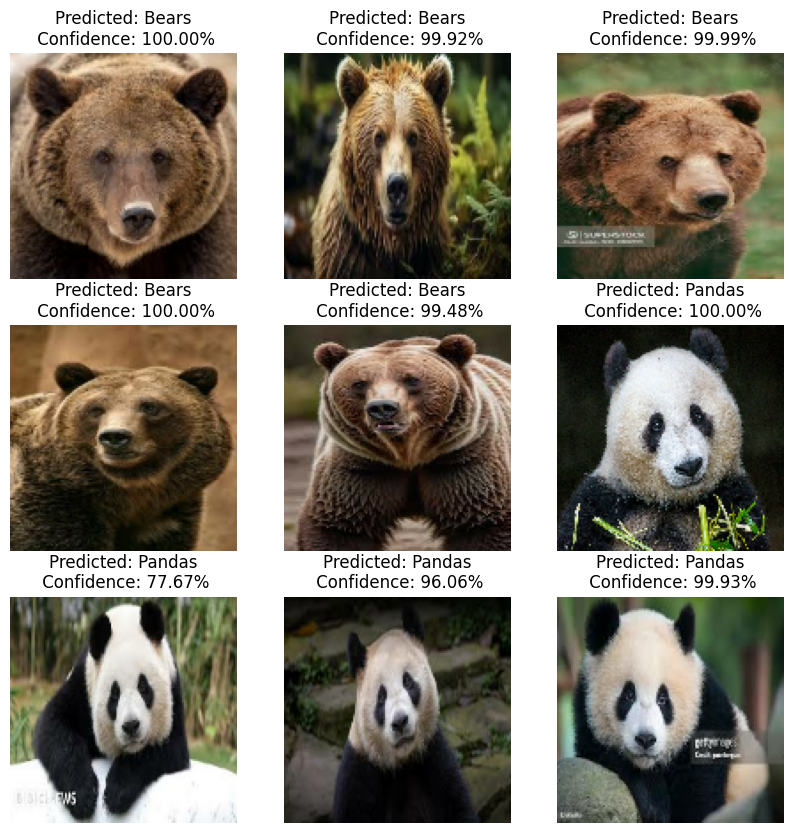

### 4.3 Sklearn Model

Another model was trained using Sklearn, this model required the images be flattened into a 1D array and that features be extracted and fed as input. The simpler model is also less prone to overfitting but may not capture the complex non-linear relationship in the data. When it comes to computational cost, SVC is definetly faster to train. Both models achieved high accuracy in this case. However, CNNs are generally known to be superior in terms of image classification taks. Especially with large and complex datasets.

## 5 Challenges & Future Work

### 5.1 Challenges

Some challenges I faced included computational time, overfitting, low performance, and undesirable evaluation metrics.

To address computational time I employed caching and prefetching mechanisms in hopes to optimize the image loading speed. Despite this change and the relatively small dataset, the model still took approxiametly 70 seconds per epoch. A trade-off was introduced between data augmentation which improves model performance and computational overhead. I decided that the improved model performance was worth the 10 minute wait.

When it comes to overfitting I was able to put in place a few proactive and reactive measures that resulted in a model with more stabilized learning. These included Data Augmentation, Normilization, L2 Regularization, Dropout, and Early Stopping. Learn more in `Challenges to Overcome` Section `3.2 Overfitting`.

Low performance ended up being an easy fix with a small tweak to the L2 Regularization and Dropout values added to reduce overfitting. Undersirable evaluation metrics was a pesky challenge but in the end was due only to a small error in the code.

### 5.2 Future Work

The first thing I would try to accomplish would be exploring ways to improve the computational cost of the CNN model. I believe there are likely ways to speed up the model training process and still achieve exceptional performance.

Expanding the dataset with more images could further improve the model's generalization and performance. I would also explore testing the model on a wider variety of images from different sources would assess its real-world applicability and robustness.


### Exporting to a pdf (not part of final)

In [ ]:
!pip install nbconvert

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!jupyter nbconvert --to pdf --output /content/ModelSelectionAndTraining.pdf /content/ModelSelectionAndTraining.ipynb

[NbConvertApp] Converting notebook /content/ModelSelectionAndTraining.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 12 column 1: not an object
[NbConvertApp] Support files will be in /content/ModelSelectionAndTraining_files/
[NbConvertApp] Writing 109664 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1905162 bytes to /content/ModelSelectionAndTraining.pdf
